In [98]:
import numpy as np
import pandas as pd
import talib 
import tensorflow
import keras

In [99]:
import random
random.seed(1234)

In [100]:
dataset = pd.read_csv('C:\\BÜSRA\\Uni\\Master\\Pflichtfächer\\Projekt Simulation SS 18\\DATEN IBM\\ohlc_jan17_feb18.csv')
dataset = dataset.dropna()
dataset = dataset[['<OPEN>','<HIGH>','<LOW>','<CLOSE>']]

In [101]:
dataset.head()

,<OPEN>,<HIGH>,<LOW>,<CLOSE>
0,167.130,167.86,166.02,167.18
1,167.615,169.84,167.42,169.24
2,169.250,169.36,167.29,168.72
3,168.800,169.91,167.66,169.56
4,169.470,169.73,167.66,167.71


In [102]:
#fh=open("C:\\Users\\Büsra\\Desktop\\KNN_Log_Returns_output.txt",'w')
#print(dataset,file=fh)
#fh.close()

In [103]:
dataset['H-L'] = dataset['<HIGH>'] - dataset['<LOW>']
dataset['O-C'] = dataset['<CLOSE>'] - dataset['<OPEN>']
dataset['Log Renditen'] = np.log(dataset['<CLOSE>']/dataset['<CLOSE>'].shift(1))
dataset['Log Renditen(t+1)']=dataset['Log Renditen'].shift(-1)

In [104]:
dataset = dataset.dropna()
dataset = dataset.dropna(thresh=2)
dataset.head()

,<OPEN>,<HIGH>,<LOW>,<CLOSE>,H-L,O-C,Log Renditen,Log Renditen(t+1)
1,167.615,169.84,167.42,169.24,2.42,1.625,0.012247,-0.003077
2,169.250,169.36,167.29,168.72,2.07,-0.530,-0.003077,0.004966
3,168.800,169.91,167.66,169.56,2.25,0.760,0.004966,-0.010971
4,169.470,169.73,167.66,167.71,2.07,-1.760,-0.010971,-0.012963
5,167.960,167.99,165.42,165.55,2.57,-2.410,-0.012963,0.013142


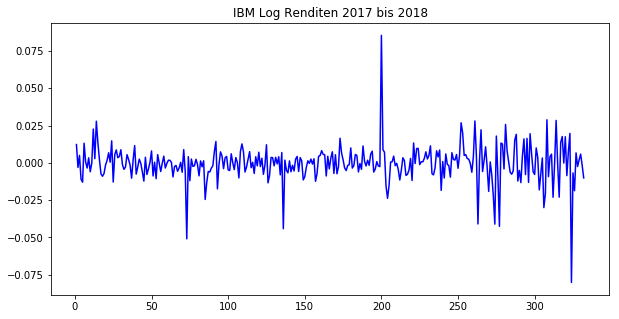

In [105]:
from matplotlib import pyplot
%matplotlib inline
datz = dataset['Log Renditen']
#datz.head()
pyplot.figure(figsize=(10,5))
pyplot.plot(datz, color='b')
pyplot.title('IBM Log Renditen 2017 bis 2018')
pyplot.show()

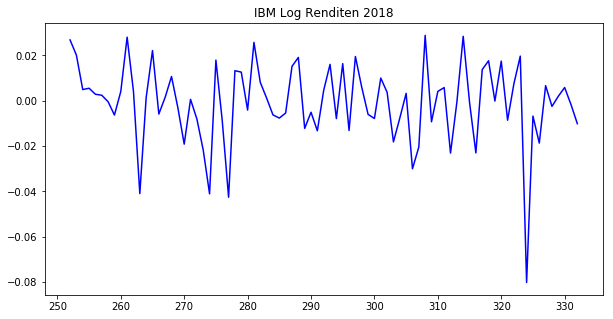

In [106]:
from matplotlib import pyplot
%matplotlib inline
datz = dataset['Log Renditen'][251:]
#datz.head()
pyplot.figure(figsize=(10,5))
pyplot.plot(datz, color='b')
pyplot.title('IBM Log Renditen 2018')
pyplot.show()

In [107]:
X = dataset[['<CLOSE>', 'H-L','O-C']]
y = dataset[['Log Renditen(t+1)']]

In [108]:
X.head()

,<CLOSE>,H-L,O-C
1,169.24,2.42,1.625
2,168.72,2.07,-0.530
3,169.56,2.25,0.760
4,167.71,2.07,-1.760
5,165.55,2.57,-2.410


In [109]:
y.head()

,Log Renditen(t+1)
1,-0.003077
2,0.004966
3,-0.010971
4,-0.012963
5,0.013142


In [110]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)
y = scaler.fit_transform(y)

In [111]:
X_train = X[:251]
X_test = X[251:]
y_train = y[:251]
y_test = y[251:]

In [112]:
print(len(X_train), len(X_test))
print(len(y_train),len(y_test))

251 81
251 81


In [113]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [114]:
knn = Sequential()
knn.add(Dense(units = 12, kernel_initializer = 'uniform', activation = 'relu', input_dim = X.shape[1]))
knn.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
knn.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'linear'))

In [115]:
knn.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [116]:
hist = knn.fit(X_train, y_train, batch_size = 10, epochs = 50, validation_data=(X_test, y_test), verbose=2, shuffle=False)

Train on 251 samples, validate on 81 samples
Epoch 1/50
 - 0s - loss: 0.2219 - val_loss: 0.2056
Epoch 2/50
 - 0s - loss: 0.1808 - val_loss: 0.1515
Epoch 3/50
 - 0s - loss: 0.1138 - val_loss: 0.0697
Epoch 4/50
 - 0s - loss: 0.0344 - val_loss: 0.0149
Epoch 5/50
 - 0s - loss: 0.0056 - val_loss: 0.0170
Epoch 6/50
 - 0s - loss: 0.0082 - val_loss: 0.0146
Epoch 7/50
 - 0s - loss: 0.0068 - val_loss: 0.0146
Epoch 8/50
 - 0s - loss: 0.0065 - val_loss: 0.0146
Epoch 9/50
 - 0s - loss: 0.0063 - val_loss: 0.0144
Epoch 10/50
 - 0s - loss: 0.0060 - val_loss: 0.0143
Epoch 11/50
 - 0s - loss: 0.0058 - val_loss: 0.0142
Epoch 12/50
 - 0s - loss: 0.0056 - val_loss: 0.0141
Epoch 13/50
 - 0s - loss: 0.0054 - val_loss: 0.0140
Epoch 14/50
 - 0s - loss: 0.0052 - val_loss: 0.0139
Epoch 15/50
 - 0s - loss: 0.0051 - val_loss: 0.0138
Epoch 16/50
 - 0s - loss: 0.0049 - val_loss: 0.0137
Epoch 17/50
 - 0s - loss: 0.0048 - val_loss: 0.0136
Epoch 18/50
 - 0s - loss: 0.0047 - val_loss: 0.0135
Epoch 19/50
 - 0s - loss: 0.

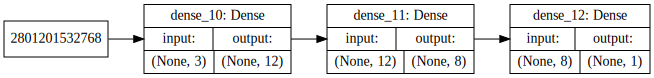

In [117]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
SVG(model_to_dot(knn, show_shapes=True, rankdir='LR').create(prog='dot', format='svg'))

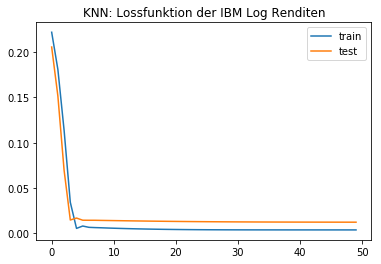

In [118]:
# plot history
pyplot.plot(hist.history['loss'], label='train')
pyplot.plot(hist.history['val_loss'], label='test')
pyplot.title('KNN: Lossfunktion der IBM Log Renditen')
pyplot.legend()
pyplot.show()

In [119]:
y_pred = knn.predict(X_test)
#y_pred
#y_test

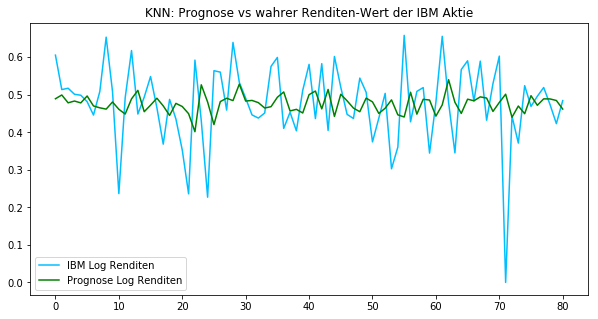

In [120]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(y_test, color='deepskyblue', label='IBM Log Renditen')
plt.plot(y_pred , color='g', label='Prognose Log Renditen')
plt.title('KNN: Prognose vs wahrer Renditen-Wert der IBM Aktie')
plt.legend()
plt.show()

In [121]:
#y_test

In [122]:
#y_pred

In [123]:
from math import sqrt
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print('Test MSE: %.4f' % mse)

rmse = sqrt(mean_squared_error(y_test, y_pred))
print('Test RMSE: %.4f' % rmse)

Test MSE: 0.0125
Test RMSE: 0.1116


In [124]:
LP_knn_log_return=open("C:\\BÜSRA\\Uni\\Master\\Pflichtfächer\\Projekt Simulation SS 18\\Output\\Langzeit Output\\LP_KNN_Log_Returns.txt",'w')
print(y_test,file=LP_knn_log_return)
LP_knn_log_return.close()

In [125]:
LP_knn_output_log_return=open("C:\\BÜSRA\\Uni\\Master\\Pflichtfächer\\Projekt Simulation SS 18\\Output\\Langzeit Output\\LP_KNN_Log_Returns_output.txt",'w')
print(y_pred,file=LP_knn_output_log_return)
LP_knn_output_log_return.close()